        CITATION PROJECT 

In [59]:
# Change the line of code below to use the Bolt URL,  and Password of your Sandbox.
# graph = Graph("<Bolt URL>", auth=("neo4j", "<Password>")) 
 
graph = Graph("bolt://34.234.203.45:35554", auth=("neo4j", "steamer-weapon-straighteners"))

In [60]:
from py2neo import Graph
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [61]:
# Change the line of code below to use the IP Address, Bolt Port, and Password of your Sandbox.
# graph = Graph("bolt://<IP Address>:<Bolt Port>", auth=("neo4j", "<Password>")) 
 
graph = Graph("bolt://34.234.203.45:35554", auth=("neo4j", "steamer-weapon-straighteners"))

In [62]:
graph.run("CALL db.schema()").data()

[{'nodes': [(_-7:Venue {constraints: ['CONSTRAINT ON ( venue:Venue ) ASSERT venue.name IS UNIQUE'], indexes: [], name: 'Venue'}),
   (_-5:Article {constraints: ['CONSTRAINT ON ( article:Article ) ASSERT article.index IS UNIQUE'], indexes: ['title,abstract'], name: 'Article'}),
   (_-8:Node {constraints: [], indexes: [], name: 'Node'}),
   (_-6:Author {constraints: ['CONSTRAINT ON ( author:Author ) ASSERT author.name IS UNIQUE'], indexes: [], name: 'Author'})],
  'relationships': [(Article)-[:VENUE {}]->(Venue),
   (Node)-[:FRIENDS {}]->(Node),
   (Article)-[:AUTHOR {}]->(Author),
   (Article)-[:CITED {}]->(Article)]}]

In [63]:
result = {"label": [], "count": []}
for label in graph.run("CALL db.labels()").to_series():
    query = f"MATCH (:`{label}`) RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["label"].append(label)
    result["count"].append(count)
nodes_df = pd.DataFrame(data=result)
nodes_df.sort_values("count")

,label,count
2,Venue,4
3,Node,5
0,Article,51956
1,Author,80299


In [65]:
result = {"relType": [], "count": []}
for relationship_type in graph.run("CALL db.relationshipTypes()").to_series():
    query = f"MATCH ()-[:`{relationship_type}`]->() RETURN count(*) as count"
    count = graph.run(query).to_data_frame().iloc[0]['count']
    result["relType"].append(relationship_type)
    result["count"].append(count)
rels_df = pd.DataFrame(data=result)
rels_df.sort_values("count")

,relType,count
3,FRIENDS,6
2,CITED,28706
0,VENUE,51956
1,AUTHOR,140575


In [67]:
exploratory_query = """
MATCH (author:Author)<-[:AUTHOR]-(article:Article)-[:VENUE]->(venue)
RETURN article.title AS article, author.name AS author, venue.name AS venue, 
       size((article)-[:CITED]->()) AS citationsGiven, size((article)<-[:CITED]-()) AS citationsReceived
ORDER BY rand()
LIMIT 25
"""

graph.run(exploratory_query).to_data_frame()

,article,author,venue,citationsGiven,citationsReceived
0,Implementation of Realtime and Highspeed Phase...,Manfred Glesner,Lecture Notes in Computer Science,0,0
1,Primal-dual approaches to the Steiner problem,Siavash Vahdati Daneshmand,Lecture Notes in Computer Science,0,0
2,Learning to Find Graph Pre-images,Koji Tsuda,Lecture Notes in Computer Science,0,0
3,THINGS THAT SEE,James L. Crowley,Communications of The ACM,0,3
4,Face detection based on the manifold,Jie Chen,Lecture Notes in Computer Science,0,0
5,Lifting Integer Variables In Minimal Inequalit...,Laurence A. Wolsey,Lecture Notes in Computer Science,0,0
6,Nonlinear enhancement of extremely high contra...,Saibabu Arigela,Lecture Notes in Computer Science,0,0
7,An architecture for multi-agent negotiation us...,Takahiro Shintani,Lecture Notes in Computer Science,0,0
8,Simulation of Evolable Hardware to Solve Low L...,Steve Smith,Lecture Notes in Computer Science,0,1
9,TradeMaker: automated dynamic analysis of synt...,Chong Tang,international conference on software engineering,3,0


# showing the articles that cite the most other papers
 

In [71]:
query = """
MATCH (a:Article)
RETURN size((a)-[:CITED]->()) AS cited
"""

cited_df = graph.run(query).to_data_frame()
cited_df.describe([.25, .5, .75, .9, .99])

,cited
count,51956.000
mean,0.553
std,1.301
min,0.000
25%,0.000
50%,0.000
75%,1.000
90%,2.000
99%,6.000
max,51.000


In [73]:
query = """
MATCH (a:Author)
RETURN size((a)<-[:AUTHOR]-()) AS published
"""

published_df = graph.run(query).to_data_frame()
published_df.describe([.25, .5, .75, .9, .99])



,published
count,80299.000
mean,1.751
std,2.064
min,1.000
25%,1.000
50%,1.000
75%,2.000
90%,3.000
99%,10.000
max,89.000


# popular authors


In [75]:
popular_authors_query = """
MATCH (author:Author)
RETURN author.name, size((author)<-[:AUTHOR]-()) AS articlesPublished
ORDER BY articlesPublished DESC
LIMIT 10
"""

graph.run(popular_authors_query).to_data_frame()

,author.name,articlesPublished
0,Peter G. Neumann,89
1,Peter J. Denning,80
2,Moshe Y. Vardi,72
3,Pamela Samuelson,71
4,Bart Preneel,65
5,Vinton G. Cerf,56
6,Barry W. Boehm,53
7,Mark Guzdial,49
8,Edwin R. Hancock,47
9,Josef Kittler,46


# Filter By Author

In [76]:
author_name = "Peter G. Neumann"

In [77]:
author_articles_query = """
MATCH (:Author {name: $authorName})<-[:AUTHOR]-(article)
RETURN article.title AS article, article.year AS year, size((article)<-[:CITED]-()) AS citations
ORDER BY citations DESC
LIMIT 20
"""

graph.run(author_articles_query,  {"authorName": author_name}).to_data_frame()

,article,year,citations
0,"The foresight saga, redux",2012,2
1,Security by obscurity,2003,2
2,Risks of automation: a cautionary total-system...,2016,1
3,Crypto policy perspectives,1994,1
4,Risks of National Identity Cards,2001,1
5,"Computers, ethics, and values",1991,1
6,Are dependable systems feasible,1993,1
7,Information system security redux,2003,1
8,The foresight saga,2006,1
9,Robust open-source software,1999,1


# Author's collaborators


In [78]:
collaborations_query = """
MATCH (:Author {name: $authorName})<-[:AUTHOR]-(article)-[:AUTHOR]->(coauthor)
RETURN coauthor.name AS coauthor, count(*) AS collaborations
ORDER BY collaborations DESC
LIMIT 10
"""

graph.run(collaborations_query,  {"authorName": author_name}).to_data_frame()

,coauthor,collaborations
0,Lauren Weinstein,3
1,Whitfield Diffie,3
2,Susan Landau,3
3,Steven Michael Bellovin,2
4,Matt Blaze,2
5,Rebecca T. Mercuri,2
6,Alfred Z. Spector,1
7,Seymour E. Goodman,1
8,David Lorge Parnas,1
9,Douglas Miller,1


# suggest future collaborators for this author


In [80]:
collaborations_query = """
MATCH (author:Author {name: $authorName})<-[:AUTHOR]-(article)-[:AUTHOR]->(coauthor),
      (coauthor)<-[:AUTHOR]-()-[:AUTHOR]->(coc)
WHERE not((coc)<-[:AUTHOR]-()-[:AUTHOR]->(author)) AND coc <> author      
RETURN coc.name AS coauthor, count(*) AS collaborations
ORDER BY collaborations DESC
LIMIT 10
"""

graph.run(collaborations_query,  {"authorName": author_name}).to_data_frame()

,coauthor,collaborations
0,John Ioannidis,10
1,Scott Bradner,9
2,Angelos D. Keromytis,8
3,John Kelsey,7
4,Virgil D. Gligor,5
5,David Wagner,4
6,Peter Wolcott,4
7,Ran Canetti,4
8,Gerald Jay Sussman,4
9,David K. Gifford,4


# top20 suggested collaborators for 'Brian Fitzgerald'


In [82]:
query = """
MATCH (author:Author {name: $authorName})<-[:AUTHOR]-(article)-[:AUTHOR]->(coauthor),
      (coauthor)<-[:AUTHOR]-()-[:AUTHOR]->(coc)
WHERE not((coc)<-[:AUTHOR]-()-[:AUTHOR]->(author)) AND coc <> author      
RETURN coc.name AS coauthor, count(*) AS collaborations
ORDER BY collaborations DESC
LIMIT 20
"""

params = {"authorName": "Brian Fitzgerald", "searchTerm": "open source"}
graph.run(query, params).to_data_frame()

,coauthor,collaborations
0,Holger Giese,5
1,Robert C. Seacord,4
2,Chris Jensen,4
3,Grace A. Lewis,4
4,Gabriel A. Moreno,4
5,Judith A. Stafford,4
6,Kurt C. Wallnau,4
7,Ivar Jacobson,3
8,Klaus Pohl,3
9,Nicolás López,3


# how many occuring more than thrice

In [84]:
query = """
MATCH (author:Author {name: $authorName})<-[:AUTHOR]-(article)-[:AUTHOR]->(coauthor),
      (coauthor)<-[:AUTHOR]-()-[:AUTHOR]->(coc)
WHERE not((coc)<-[:AUTHOR]-()-[:AUTHOR]->(author)) AND coc <> author      
WITH coc, count(*) AS collaborations
WHERE collaborations > 3
RETURN count(*)
"""
graph.run(query, params).to_data_frame()

,count(*)
0,7


# page rank recommendation


In [86]:
query = """
CALL algo.pageRank('Article', 'CITED')
"""
graph.run(query).data()

[{'nodes': 51956,
  'iterations': 20,
  'loadMillis': 66,
  'computeMillis': 27,
  'writeMillis': 118,
  'dampingFactor': 0.85,
  'write': True,
  'writeProperty': 'pagerank'}]

In [87]:
query = """
MATCH (a:Article)
RETURN a.title as article,
       a.pagerank as score
ORDER BY score DESC 
LIMIT 10
"""
graph.run(query).to_data_frame()

,article,score
0,A method for obtaining digital signatures and ...,93.943
1,Secure communications over insecure channels,79.869
2,Rough sets,25.609
3,An axiomatic basis for computer programming,23.029
4,"Pastry: Scalable, Decentralized Object Locatio...",21.470
5,SCRIBE: The Design of a Large-Scale Event Noti...,19.486
6,A field study of the software design process f...,19.028
7,Productivity factors and programming environments,18.499
8,Analyzing medium-scale software development,16.453
9,A Calculus of Communicating Systems,15.431


# personalized pagerank

In [89]:
query = """
MATCH (a:Author {name: $author})<-[:AUTHOR]-(article)-[:CITED]->(other)
WITH collect(article) + collect(other) AS sourceNodes
CALL algo.pageRank.stream('Article', 'CITED', {sourceNodes: sourceNodes})
YIELD nodeId, score
RETURN algo.getNodeById(nodeId).title AS article, score
ORDER BY score DESC
LIMIT 10
"""

author_name = "Peter G. Neumann"
graph.run(query, {"author": author_name}).to_data_frame()

,article,score
0,A technique for software module specification ...,0.359
1,A messy state of the union: taming the composi...,0.332
2,Crypto policy perspectives,0.278
3,Risks of automation: a cautionary total-system...,0.278
4,The foresight saga,0.278
5,Risks of e-voting,0.278
6,Public interest and the NII,0.278
7,Password security: a case history,0.278
8,The challenges of partially automated driving,0.268
9,Proof techniques for hierarchically structured...,0.248


In [50]:
query = """
CALL db.indexes()
YIELD description, indexName, tokenNames, properties, state, type, progress
WHERE type = "node_fulltext"
RETURN *
"""
graph.run(query).to_data_frame()

,description,indexName,progress,properties,state,tokenNames,type
0,"INDEX ON NODE:Article(title, abstract)",articles,100.000,"[title, abstract]",ONLINE,[Article],node_fulltext


In [51]:
query = """
CALL db.index.fulltext.queryNodes("articles", "open source")
YIELD node, score
RETURN node.title, score, [(author)<-[:AUTHOR]-(node) | author.name] AS authors
LIMIT 10
"""
graph.run(query).to_data_frame()

,node.title,score,authors
0,Progressive open source,4.252,"[Rob Miller, Dean Nelson, Pankaj K. Garg, Jami..."
1,Open source application spaces: the 5th worksh...,4.081,"[Walt Scacchi, Joseph Feller, Brian Fitzgerald..."
2,Reusing Open-Source Software and Practices: Th...,4.071,"[Alan W. Brown, Grady Booch]"
3,Software architecture in an open source world,3.815,[Roy T. Fielding]
4,From Research Software to Open Source,3.784,[Susan L. Graham]
5,Open courseware and open source software,3.693,"[Stefan Baldi, Anett Mehler-Bicher, Hauke Heier]"
6,IBM's pragmatic embrace of open source,3.690,[Pamela Samuelson]
7,When to release in open source project,3.543,"[LiGuo Huang, Zeheng Li]"
8,Increased security through open source,3.515,"[Jaap-Henk Hoepman, Bart Jacobs]"
9,Is open source security a myth,3.492,[Guido Schryen]


In [52]:
#find authors that have published the most articles on open source

In [53]:
query = """
CALL db.index.fulltext.queryNodes("articles", "open source")
YIELD node, score
MATCH (node)-[:AUTHOR]->(author)
RETURN author.name, sum(score) AS totalScore, collect(node.title) AS articles
ORDER By totalScore DESC
LIMIT 20
"""

graph.run(query).to_data_frame()

,author.name,totalScore,articles
0,Brian Fitzgerald,16.119,[Open source application spaces: the 5th works...
1,Joseph Feller,16.012,[Open source application spaces: the 5th works...
2,Walt Scacchi,10.731,[Open source application spaces: the 5th works...
3,Daniel M. German,10.687,[Open source-style collaborative development p...
4,Scott A. Hissam,10.642,[Open source application spaces: the 5th works...
5,James D. Herbsleb,10.476,[A case study of a corporate open source devel...
6,Denys Poshyvanyk,8.907,[Machine learning-based detection of open sour...
7,Margaret-Anne D. Storey,8.181,[Understanding broadcast based peer review on ...
8,Peter C. Rigby,7.649,[Understanding broadcast based peer review on ...
9,Ruchika Malhotra,7.132,[An automated tool for generating change repor...


In [ ]:
# using full text search and Personalized PageRank to find interesting articles for different authors

In [55]:
query = """
MATCH (a:Author {name: $author})<-[:AUTHOR]-(article)-[:CITED]->(other)
WITH a, collect(article) + collect(other) AS sourceNodes
CALL algo.pageRank.stream(
  'CALL db.index.fulltext.queryNodes("articles", $searchTerm)
   YIELD node, score
   RETURN id(node) as id',
  'MATCH (a1:Article)-[:CITED]->(a2:Article) 
   RETURN id(a1) as source,id(a2) as target', 
  {sourceNodes: sourceNodes,graph:'cypher', params: {searchTerm: $searchTerm}})
YIELD nodeId, score
WITH algo.getNodeById(nodeId) AS n, score
WHERE not(exists((a)<-[:AUTHOR]-(n))) AND score > 0
RETURN n.title as article, score, [(n)-[:AUTHOR]->(author) | author.name][..5] AS authors
order by score desc limit 10
"""

params = {"author": "Tao Xie", "searchTerm": "open source"}
graph.run(query, params).to_data_frame()

,article,score,authors
0,Static detection of cross-site scripting vulne...,0.386,"[Zhendong Su, Gary Wassermann]"
1,Concern graphs: finding and describing concern...,0.278,"[Gail C. Murphy, Martin P. Robillard]"
2,Characterizing logging practices in open-sourc...,0.278,"[Ding Yuan, Soyeon Park, Yuanyuan Zhou]"
3,"Automated, contract-based user testing of comm...",0.278,"[Lionel C. Briand, Yvan Labiche, Michal M. Sówka]"
4,Who should fix this bug,0.278,"[Lyndon Hiew, John Anvik, Gail C. Murphy]"
5,Conceptual module querying for software reengi...,0.236,"[Gail C. Murphy, Elisa L. A. Baniassad]"
6,Semantics-based code search,0.150,[Steven P. Reiss]
7,Bandera: extracting finite-state models from J...,0.150,"[Matthew B. Dwyer, Hongjun Zheng, James C. Cor..."
8,AsDroid: detecting stealthy behaviors in Andro...,0.150,"[Lin Tan, Jianjun Huang, Xiangyu Zhang, Bin Li..."
9,EXSYST: search-based GUI testing,0.128,"[Andreas Zeller, Gordon Fraser, Florian Gross]"


the same query for a different author

In [57]:
params = {"author": "Marco Aurélio Gerosa", "searchTerm": "open source"}
graph.run(query, params).to_data_frame()

,article,score,authors
0,Toward an understanding of the motivation of o...,0.388,"[Yunwen Ye, Kouichi Kishida]"
1,Hipikat: recommending pertinent software devel...,0.322,"[Gail C. Murphy, Davor Cubranic]"
2,Version Sensitive Editing: Change History as a...,0.274,[David L. Atkins]
3,Which bug should I fix: helping new developers...,0.239,"[Jianguo Wang, Anita Sarma]"
4,Tesseract: Interactive visual exploration of s...,0.203,"[Anita Sarma, Larry Maccherone, Patrick Wagstr..."
5,Role Migration and Advancement Processes in OS...,0.175,"[Walt Scacchi, Chris Jensen]"
6,Does the initial environment impact the future...,0.175,"[Minghui Zhou, Audris Mockus]"
7,Unifying artifacts and activities in a visual ...,0.173,"[Jon Froehlich, Paul Dourish]"
8,A case study of open source software developme...,0.110,"[James D. Herbsleb, Audris Mockus, Roy Fielding]"
9,A case study of the evolution of Jun: an objec...,0.110,"[Yoshiyuki Nishinaka, Atsushi Aoki, Kouichi Ki..."


In [93]:
#predictions


In [94]:
import pandas as pd
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

In [96]:
query = """
CALL apoc.periodic.iterate(
  "MATCH (a1)<-[:AUTHOR]-(paper)-[:AUTHOR]->(a2:Author)
   WITH a1, a2, paper
   ORDER BY a1, paper.year
   RETURN a1, a2, collect(paper)[0].year AS year, count(*) AS collaborations",
  "MERGE (a1)-[coauthor:CO_AUTHOR {year: year}]-(a2)
   SET coauthor.collaborations = collaborations", 
  {batchSize: 100})
"""

graph.run(query).stats()

{'constraints_added': 0,
 'constraints_removed': 0,
 'indexes_added': 0,
 'indexes_removed': 0,
 'labels_added': 0,
 'labels_removed': 0,
 'nodes_created': 0,
 'nodes_deleted': 0,
 'properties_set': 0,
 'relationships_deleted': 0,
 'relationships_created': 0,
 'contains_updates': False}

In [98]:
query = """
MATCH (a)-[r:CO_AUTHOR]->(b) 
where r.year < 2006
MERGE (a)-[:CO_AUTHOR_EARLY {year: r.year}]-(b);
"""

graph.run(query).stats()

{'constraints_added': 0,
 'constraints_removed': 0,
 'indexes_added': 0,
 'indexes_removed': 0,
 'labels_added': 0,
 'labels_removed': 0,
 'nodes_created': 0,
 'nodes_deleted': 0,
 'properties_set': 81096,
 'relationships_deleted': 0,
 'relationships_created': 81096,
 'contains_updates': True}

In [99]:
query = """
MATCH (a)-[r:CO_AUTHOR]->(b) 
where r.year >= 2006
MERGE (a)-[:CO_AUTHOR_LATE {year: r.year}]-(b);
"""

graph.run(query).stats()

{'constraints_added': 0,
 'constraints_removed': 0,
 'indexes_added': 0,
 'indexes_removed': 0,
 'labels_added': 0,
 'labels_removed': 0,
 'nodes_created': 0,
 'nodes_deleted': 0,
 'properties_set': 74128,
 'relationships_deleted': 0,
 'relationships_created': 74128,
 'contains_updates': True}

To Determine how many co-author relationship we have in each of these sub graphs:

In [100]:
query = """
MATCH ()-[:CO_AUTHOR_EARLY]->()
RETURN count(*) AS count
"""

graph.run(query).to_data_frame()

,count
0,81096


In [101]:
query = """
MATCH ()-[:CO_AUTHOR_LATE]->()
RETURN count(*) AS count
"""

graph.run(query).to_data_frame()

,count
0,74128


In [103]:
def down_sample(df):
    copy = df.copy()
    zero = Counter(copy.label.values)[0]
    un = Counter(copy.label.values)[1]
    n = zero - un
    copy = copy.drop(copy[copy.label == 0].sample(n=n, random_state=1).index)
    return copy.sample(frac=1)

In [108]:
train_existing_links = graph.run("""
MATCH (author:Author)-[:CO_AUTHOR_EARLY]->(other:Author)
RETURN id(author) AS node1, id(other) AS node2, 1 AS label
""").to_data_frame()

train_missing_links = graph.run("""
MATCH (author:Author)
WHERE (author)-[:CO_AUTHOR_EARLY]-()
MATCH (author)-[:CO_AUTHOR_EARLY*2..3]-(other)
WHERE not((author)-[:CO_AUTHOR_EARLY]-(other))
RETURN id(author) AS node1, id(other) AS node2, 0 AS label
""").to_data_frame()
train_missing_links = train_missing_links.drop_duplicates()

In [109]:
training_df = train_missing_links.append(train_existing_links, ignore_index=True)
training_df['label'] = training_df['label'].astype('category')
training_df = down_sample(training_df)

Now our train DataFrame contains:

In [107]:
training_df.head()

,node1,node2,label
1000103,64629,78700,1
1021971,135082,135083,1
458499,84209,72664,0
763766,179430,27215,0
1016685,118225,118226,1


repeat the process for the test set:

In [110]:
test_existing_links = graph.run("""
MATCH (author:Author)-[:CO_AUTHOR_LATE]->(other:Author)
RETURN id(author) AS node1, id(other) AS node2, 1 AS label
""").to_data_frame()

test_missing_links = graph.run("""
MATCH (author:Author)
WHERE (author)-[:CO_AUTHOR_LATE]-()
MATCH (author)-[:CO_AUTHOR_LATE*2..3]-(other)
WHERE not((author)-[:CO_AUTHOR_LATE]-(other))
RETURN id(author) AS node1, id(other) AS node2, 0 AS label
""").to_data_frame()
test_missing_links = test_missing_links.drop_duplicates()

In [111]:
test_df = test_missing_links.append(test_existing_links, ignore_index=True)
test_df['label'] = test_df['label'].astype('category')
test_df = down_sample(test_df)

In [112]:
classifier = RandomForestClassifier(n_estimators=30, max_depth=10, random_state=0)

In [113]:
def apply_graphy_features(data, rel_type):
    query = """
    UNWIND $pairs AS pair
    MATCH (p1) WHERE id(p1) = pair.node1
    MATCH (p2) WHERE id(p2) = pair.node2
    RETURN pair.node1 AS node1,
           pair.node2 AS node2,
           algo.linkprediction.commonNeighbors(
               p1, p2, {relationshipQuery: $relType}) AS cn,
           algo.linkprediction.preferentialAttachment(
               p1, p2, {relationshipQuery: $relType}) AS pa,
           algo.linkprediction.totalNeighbors(
               p1, p2, {relationshipQuery: $relType}) AS tn
    """
    pairs = [{"node1": node1, "node2": node2}  for node1,node2 in data[["node1", "node2"]].values.tolist()]
    features = graph.run(query, {"pairs": pairs, "relType": rel_type}).to_data_frame()
    return pd.merge(data, features, on = ["node1", "node2"])

Now apply the function to the training DataFrame:

In [114]:
training_df = apply_graphy_features(training_df, "CO_AUTHOR_EARLY")

This is what the DataFrame looks like now:

In [115]:
training_df.head()

,node1,node2,label,cn,pa,tn
0,66286,20422,0,0.000,120.000,22.000
1,1154,20694,1,0.000,21.000,22.000
2,66114,123156,1,2.000,42.000,15.000
3,84136,84137,1,0.000,1.000,2.000
4,52334,71209,1,6.000,153.000,20.000


Doing the same to the test DataFrame:

In [116]:
test_df = apply_graphy_features(test_df, "CO_AUTHOR")

In [117]:
test_df.head()

,node1,node2,label,cn,pa,tn
0,196613,196614,1,12.000,169.000,14.000
1,174431,145123,0,1.000,51.000,19.000
2,188418,123601,0,2.000,184.000,48.000
3,213846,170215,0,0.000,644.000,60.000
4,209768,160926,0,0.000,30.000,11.000


Next, we will build a model based on these graphy features. we will start by just using one of the features - common neighbors. 

The following code builds a random forest model, evaluates it against the test dataset, and then indicates which of the features had the most importance in the model.

In [118]:
columns = ["cn"]

X = training_df[columns]
y = training_df["label"]
classifier.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Next, you need to evaluate the model. You will compute its accuracy, precision, and recall. Then, you will return the importance of each feature used in the model. The following functions will help with this:

In [119]:
def evaluate_model(predictions, actual):
    return pd.DataFrame({
        "Measure": ["Accuracy", "Precision", "Recall"],
        "Score": [accuracy_score(actual, predictions), 
                  precision_score(actual, predictions), 
                  recall_score(actual, predictions)]
    })

def feature_importance(columns, classifier):        
    display("Feature Importance")
    df = pd.DataFrame({
        "Feature": columns,
        "Importance": classifier.feature_importances_
    })
    df = df.sort_values("Importance", ascending=False)    
    ax = df.plot(kind='bar', x='Feature', y='Importance', legend=None)
    ax.xaxis.set_label_text("")
    plt.tight_layout()
    plt.show()

,Measure,Score
0,Accuracy,0.854
1,Precision,0.944
2,Recall,0.753


'Feature Importance'

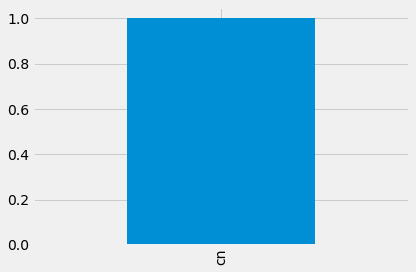

In [120]:
predictions = classifier.predict(test_df[columns])
y_test = test_df["label"]

display(evaluate_model(predictions, y_test))
feature_importance(columns, classifier)

The scores for accuracy and precision are adequate, but the recall is not very good. 

,Measure,Score
0,Accuracy,0.919
1,Precision,0.921
2,Recall,0.917


'Feature Importance'

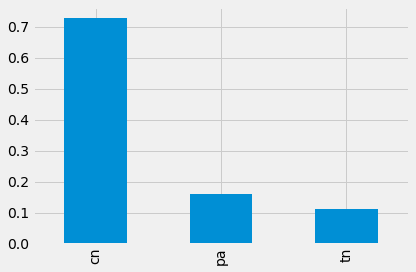

In [121]:
columns = ["cn", "pa", "tn"]

X = training_df[columns]
y = training_df["label"]
classifier.fit(X, y)

predictions = classifier.predict(test_df[columns])
y_test = test_df["label"]

display(evaluate_model(predictions, y_test))
feature_importance(columns, classifier)

In [122]:
graph.run("""
CALL algo.triangleCount('Author', 'CO_AUTHOR_EARLY', { write:true,
writeProperty:'trianglesTrain', clusteringCoefficientProperty:'coefficientTrain'});
""").to_data_frame()

,loadMillis,computeMillis,writeMillis,postProcessingMillis,nodeCount,triangleCount,averageClusteringCoefficient,p1,p5,p10,p25,p50,p75,p90,p95,p99,p100,write,writeProperty,clusteringCoefficientProperty
0,264,158,12,313,80299,97205,0.375,0,0,0,0,0,3,7,15,45,787,True,trianglesTrain,coefficientTrain


In [123]:
graph.run("""
CALL algo.triangleCount('Author', 'CO_AUTHOR', { write:true,
writeProperty:'trianglesTest', clusteringCoefficientProperty:'coefficientTest'});
""").to_data_frame()

,loadMillis,computeMillis,writeMillis,postProcessingMillis,nodeCount,triangleCount,averageClusteringCoefficient,p1,p5,p10,p25,p50,p75,p90,p95,p99,p100,write,writeProperty,clusteringCoefficientProperty
0,436,143,7,300,80299,199813,0.657,0,0,0,1,3,6,15,26,91,787,True,trianglesTest,coefficientTest


The following function will add these features to the train and test DataFrames:

In [124]:
def apply_triangles_features(data, triangles_prop, coefficient_prop):
    query = """
    UNWIND $pairs AS pair
    MATCH (p1) WHERE id(p1) = pair.node1
    MATCH (p2) WHERE id(p2) = pair.node2
    RETURN pair.node1 AS node1,
    pair.node2 AS node2,
    apoc.coll.min([p1[$trianglesProp], p2[$trianglesProp]]) AS minTriangles,
    apoc.coll.max([p1[$trianglesProp], p2[$trianglesProp]]) AS maxTriangles,
    apoc.coll.min([p1[$coefficientProp], p2[$coefficientProp]]) AS minCoefficient,
    apoc.coll.max([p1[$coefficientProp], p2[$coefficientProp]]) AS maxCoefficient
    """    
    pairs = [{"node1": node1, "node2": node2}  for node1,node2 in data[["node1", "node2"]].values.tolist()]    
    params = {
    "pairs": pairs,
    "trianglesProp": triangles_prop,
    "coefficientProp": coefficient_prop
    }
    features = graph.run(query, params).to_data_frame()    
    return pd.merge(data, features, on = ["node1", "node2"])

Add the new features:

In [125]:
training_df = apply_triangles_features(training_df, "trianglesTrain", "coefficientTrain")
test_df = apply_triangles_features(test_df, "trianglesTest", "coefficientTest")

In [126]:
training_df.head()

,node1,node2,label,cn,pa,tn,minTriangles,maxTriangles,minCoefficient,maxCoefficient
0,66286,20422,0,0.000,120.000,22.000,18,29,0.273,0.644
1,1154,20694,1,0.000,21.000,22.000,0,37,0.000,0.176
2,66114,123156,1,2.000,42.000,15.000,3,31,0.341,1.000
3,84136,84137,1,0.000,1.000,2.000,0,0,0.000,0.000
4,52334,71209,1,6.000,153.000,20.000,24,40,0.294,0.667


In [127]:
test_df.head()

,node1,node2,label,cn,pa,tn,minTriangles,maxTriangles,minCoefficient,maxCoefficient
0,196613,196614,1,12.000,169.000,14.000,78,78,1.000,1.000
1,174431,145123,0,1.000,51.000,19.000,3,27,0.199,1.000
2,188418,123601,0,2.000,184.000,48.000,6,467,0.451,1.000
3,213846,170215,0,0.000,644.000,60.000,91,404,0.390,1.000
4,209768,160926,0,0.000,30.000,11.000,10,15,1.000,1.000


 train and evaluate a model with these features:

,Measure,Score
0,Accuracy,0.954
1,Precision,0.952
2,Recall,0.956


'Feature Importance'

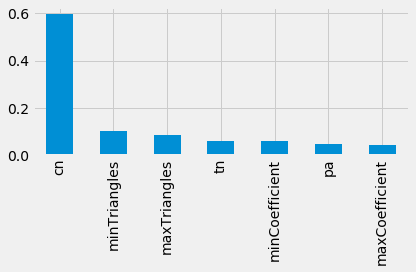

In [128]:
columns = [
    "cn", "pa", "tn", # graph features
    "minTriangles", "maxTriangles", "minCoefficient", "maxCoefficient" # triangle features  
]

X = training_df[columns]
y = training_df["label"]
classifier.fit(X, y)

predictions = classifier.predict(test_df[columns])
y_test = test_df["label"]

display(evaluate_model(predictions, y_test))
feature_importance(columns, classifier)



# Community Detection



In [129]:
graph.run("""
CALL algo.labelPropagation("Author", "CO_AUTHOR_EARLY", "BOTH",
{partitionProperty: "partitionTrain"});
""").to_data_frame()

,loadMillis,computeMillis,writeMillis,postProcessingMillis,nodes,communityCount,iterations,didConverge,p1,p5,...,p50,p75,p90,p95,p99,p100,weightProperty,write,partitionProperty,writeProperty
0,247,496,107,256,80299,47287,1,False,1,1,...,1,1,3,5,10,94,weight,True,partitionTrain,partitionTrain


In [130]:
graph.run("""
CALL algo.labelPropagation("Author", "CO_AUTHOR", "BOTH",
{partitionProperty: "partitionTest"});
""").to_data_frame()

,loadMillis,computeMillis,writeMillis,postProcessingMillis,nodes,communityCount,iterations,didConverge,p1,p5,...,p50,p75,p90,p95,p99,p100,weightProperty,write,partitionProperty,writeProperty
0,389,101,6,259,80299,22347,1,False,1,1,...,2,4,7,10,21,707,weight,True,partitionTest,partitionTest


In [131]:
graph.run("""
CALL algo.louvain.stream("Author", "CO_AUTHOR_EARLY", {includeIntermediateCommunities:true})
YIELD nodeId, community, communities
WITH algo.getNodeById(nodeId) AS node, communities[0] AS smallestCommunity
SET node.louvainTrain = smallestCommunity;
""").stats()

{'constraints_added': 0,
 'constraints_removed': 0,
 'indexes_added': 0,
 'indexes_removed': 0,
 'labels_added': 0,
 'labels_removed': 0,
 'nodes_created': 0,
 'nodes_deleted': 0,
 'properties_set': 80299,
 'relationships_deleted': 0,
 'relationships_created': 0,
 'contains_updates': True}

In [132]:
graph.run("""
CALL algo.louvain.stream("Author", "CO_AUTHOR", {includeIntermediateCommunities:true})
YIELD nodeId, community, communities
WITH algo.getNodeById(nodeId) AS node, communities[0] AS smallestCommunity
SET node.louvainTest = smallestCommunity;
""").stats()

{'constraints_added': 0,
 'constraints_removed': 0,
 'indexes_added': 0,
 'indexes_removed': 0,
 'labels_added': 0,
 'labels_removed': 0,
 'nodes_created': 0,
 'nodes_deleted': 0,
 'properties_set': 80299,
 'relationships_deleted': 0,
 'relationships_created': 0,
 'contains_updates': True}

The following function will add these features to the train and test DataFrames:

In [133]:
def apply_community_features(data, partition_prop, louvain_prop):
    query = """
    UNWIND $pairs AS pair
    MATCH (p1) WHERE id(p1) = pair.node1
    MATCH (p2) WHERE id(p2) = pair.node2
    RETURN pair.node1 AS node1,
    pair.node2 AS node2,
    algo.linkprediction.sameCommunity(p1, p2, $partitionProp) AS sp,    
    algo.linkprediction.sameCommunity(p1, p2, $louvainProp) AS sl
    """
    pairs = [{"node1": node1, "node2": node2}  for node1,node2 in data[["node1", "node2"]].values.tolist()]
    params = {
    "pairs": pairs,
    "partitionProp": partition_prop,
    "louvainProp": louvain_prop
    }
    features = graph.run(query, params).to_data_frame()
    return pd.merge(data, features, on = ["node1", "node2"])

In [134]:
training_df = apply_community_features(training_df, "partitionTrain", "louvainTrain")
test_df = apply_community_features(test_df, "partitionTest", "louvainTest")

In [135]:
training_df.head()

,node1,node2,label,cn,pa,tn,minTriangles,maxTriangles,minCoefficient,maxCoefficient,sp,sl
0,66286,20422,0,0.000,120.000,22.000,18,29,0.273,0.644,0.000,0.000
1,1154,20694,1,0.000,21.000,22.000,0,37,0.000,0.176,0.000,1.000
2,66114,123156,1,2.000,42.000,15.000,3,31,0.341,1.000,1.000,1.000
3,84136,84137,1,0.000,1.000,2.000,0,0,0.000,0.000,1.000,1.000
4,52334,71209,1,6.000,153.000,20.000,24,40,0.294,0.667,1.000,1.000


In [136]:
test_df.head()

,node1,node2,label,cn,pa,tn,minTriangles,maxTriangles,minCoefficient,maxCoefficient,sp,sl
0,196613,196614,1,12.000,169.000,14.000,78,78,1.000,1.000,1.000,1.000
1,174431,145123,0,1.000,51.000,19.000,3,27,0.199,1.000,1.000,1.000
2,188418,123601,0,2.000,184.000,48.000,6,467,0.451,1.000,1.000,1.000
3,213846,170215,0,0.000,644.000,60.000,91,404,0.390,1.000,0.000,1.000
4,209768,160926,0,0.000,30.000,11.000,10,15,1.000,1.000,0.000,0.000


,Measure,Score
0,Accuracy,0.963
1,Precision,0.965
2,Recall,0.961


'Feature Importance'

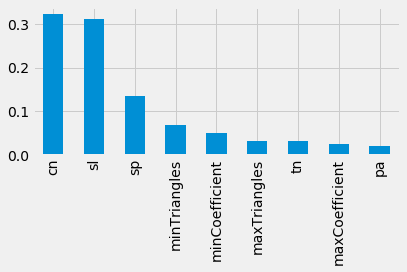

In [137]:
columns = [
    "cn", "pa", "tn", # graph features
    "minTriangles", "maxTriangles", "minCoefficient", "maxCoefficient", # triangle features  
    "sp", "sl" # community features
]

X = training_df[columns]
y = training_df["label"]
classifier.fit(X, y)

predictions = classifier.predict(test_df[columns])
y_test = test_df["label"]

display(evaluate_model(predictions, y_test))
feature_importance(columns, classifier)